In [1]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv
/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv
/kaggle/input/corpora/wordnet/data.adj
/kaggle/input/corpora/wordnet/LICENSE
/kaggle/input/corpora/wordnet/index.adj
/kaggle/input/corpora/wordnet/README
/kaggle/input/corpora/wordnet/verb.exc
/kaggle/input/corpora/wordnet/index.adv
/kaggle/input/corpora/wordnet/index.verb
/kaggle/input/corpora/wordnet/data.verb
/kaggle/input/corpora/wordnet/lexnames
/kaggle/input/corpora/wordnet/data.noun
/kaggle/input/corpora/wordnet/noun.exc
/kaggle/input/corpora/wordnet/index.noun
/kaggle/input/corpora/wordnet/adj.exc
/kaggle/input/corpora/wordnet/index.sense
/kaggle/input/corpora/wordnet/adv.exc
/kaggle/input/corpora/wordnet/cntlist.rev
/kaggle/input/corpora/wordnet/data.adv
/kaggle/input/corpora/wordnet/citation.bib


In [2]:
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('../input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv')
data_test = pd.read_csv('../input/kuc-hackathon-winter-2018/drugsComTest_raw.csv')

print("The shape of train dataset :", data.shape)
print("The shape of test dataset :", data_test.shape)

The shape of train dataset : (161297, 7)
The shape of test dataset : (53766, 7)


In [4]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
data.condition.value_counts().head(20)


Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

In [6]:
df_train = data[(data['condition']=='Birth Control') | (data['condition']=='Depression') | (data['condition']=='High Blood Pressure')|(data['condition']=='Diabetes, Type 2')|(data['condition']=='Bipolar Disorde')]


In [7]:
df_train.shape

(46956, 7)

In [8]:
X = df_train.drop(['uniqueID','drugName','rating','date','usefulCount'],axis=1)

In [9]:
X.condition.value_counts()


Birth Control          28788
Depression              9069
Bipolar Disorde         4224
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: condition, dtype: int64

In [10]:
X.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."


In [11]:
X.count

<bound method DataFrame.count of                   condition                                             review
2             Birth Control  "I used to take another oral contraceptive, wh...
3             Birth Control  "This is my first time using any form of birth...
7           Bipolar Disorde  "Abilify changed my life. There is hope. I was...
9             Birth Control  "I had been on the pill for many years. When m...
11               Depression  "I have taken anti-depressants for years, with...
...                     ...                                                ...
161278     Diabetes, Type 2  "I just got diagnosed with type 2. My doctor p...
161283      Bipolar Disorde  "I was in a very bad place at the time I start...
161286           Depression  "This is the third med I&#039;ve tried for anx...
161290  High Blood Pressure  "I have only been on Tekturna for 9 days. The ...
161291        Birth Control  "This would be my second month on Junel. I&#03...

[46956 rows x 2 co

In [12]:
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]
X_Bipolar=X[(X['condition']=='Bipolar Disorde')]

Text(0.5, 1.0, 'Word cloud for Birth control')

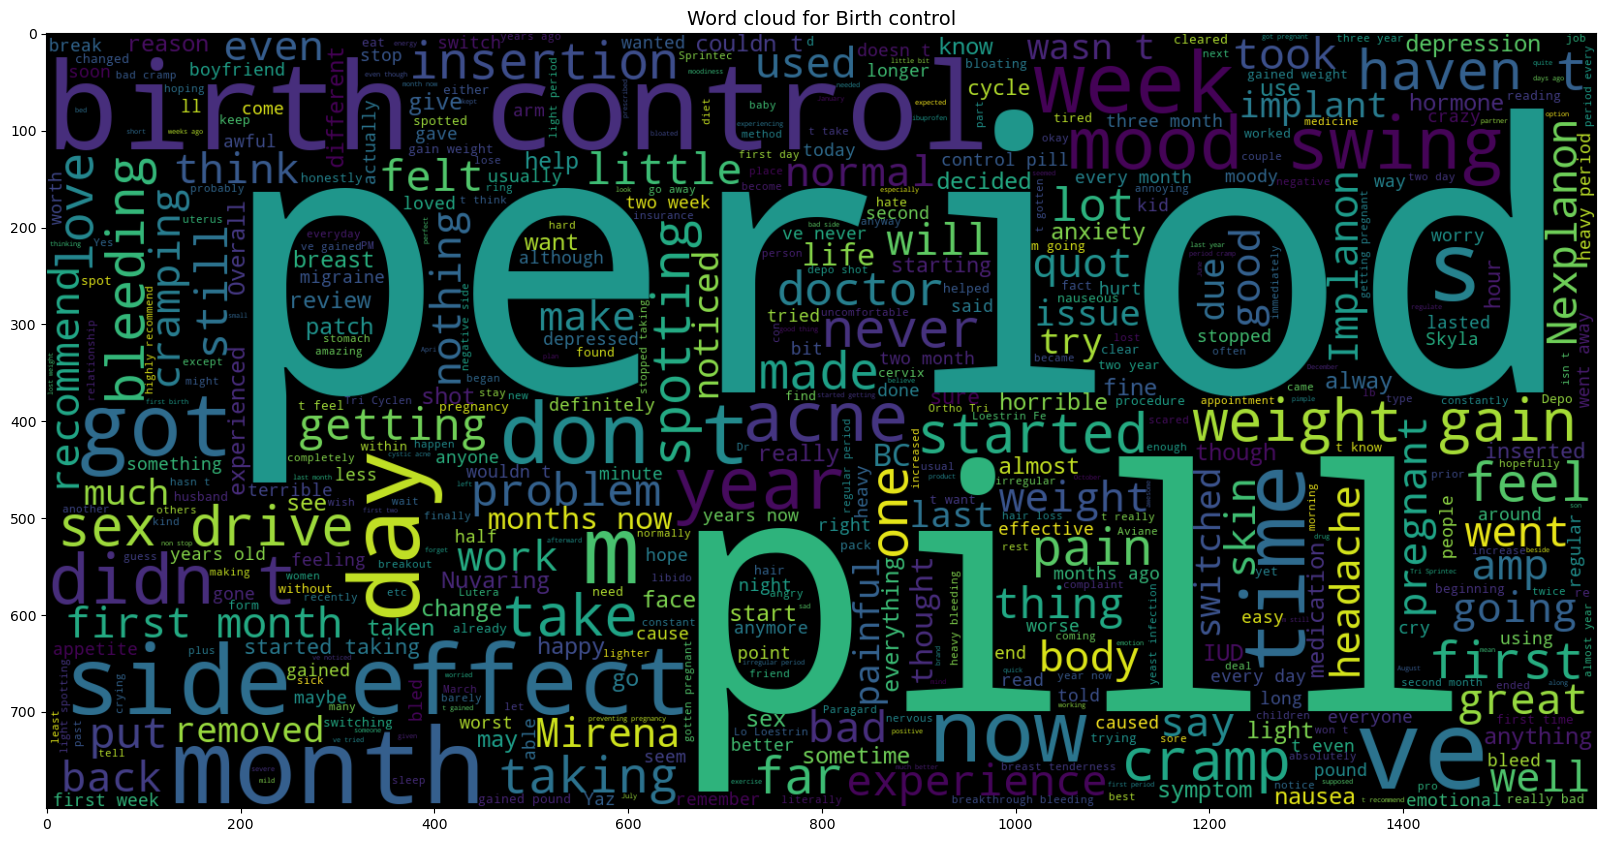

In [13]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

In [14]:
X['review'][7]

'"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."'

In [15]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')


In [16]:
from bs4 import BeautifulSoup
import re
import nltk
import sklearn
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

stop = stopwords.words('english')
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [17]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))




In [18]:
import nltk

# nltk.download("wordnet")

nltk.data.path.append('/kaggle/input')


In [19]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [20]:
X['review_clean'] = X['review'].apply(review_to_words)
X.head()

/tmp/ipykernel_32/350441967.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


,condition,review,review_clean
2,Birth Control,"I used to take another oral contraceptive, whi...",used take another oral contraceptive pill cycl...
3,Birth Control,This is my first time using any form of birth ...,first time using form birth control glad went ...
7,Bipolar Disorde,Abilify changed my life. There is hope. I was ...,abilify changed life hope zoloft clonidine fir...
9,Birth Control,I had been on the pill for many years. When my...,pill many year doctor changed rx chateal effec...
11,Depression,"I have taken anti-depressants for years, with ...",taken anti depressant year improvement mostly ...


In [21]:
X.head()

,condition,review,review_clean
2,Birth Control,"I used to take another oral contraceptive, whi...",used take another oral contraceptive pill cycl...
3,Birth Control,This is my first time using any form of birth ...,first time using form birth control glad went ...
7,Bipolar Disorde,Abilify changed my life. There is hope. I was ...,abilify changed life hope zoloft clonidine fir...
9,Birth Control,I had been on the pill for many years. When my...,pill many year doctor changed rx chateal effec...
11,Depression,"I have taken anti-depressants for years, with ...",taken anti depressant year improvement mostly ...


In [22]:
X_feature=X['review_clean']
y=X['condition']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feature, y,stratify=y,test_size=0.2, random_state=0)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# transform a given text into a vector on the basis of the frequency (count) of each word 
# that occurs in the entire text
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)
count_train

<37564x17080 sparse matrix of type '<class 'numpy.int64'>'
	with 1189646 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


accuracy:   0.941


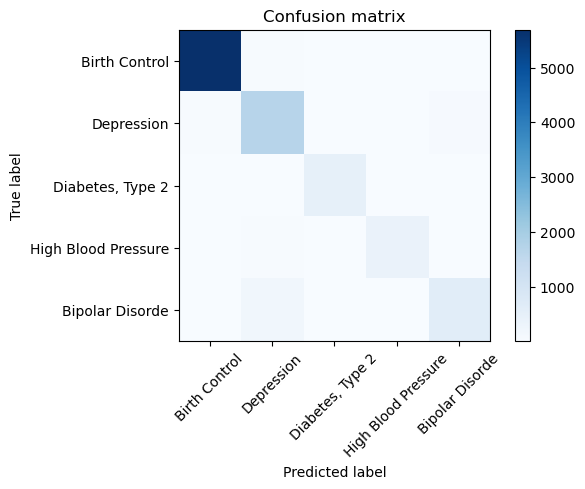

In [27]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Bipolar Disorde'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Bipolar Disorde'])


accuracy:   0.951


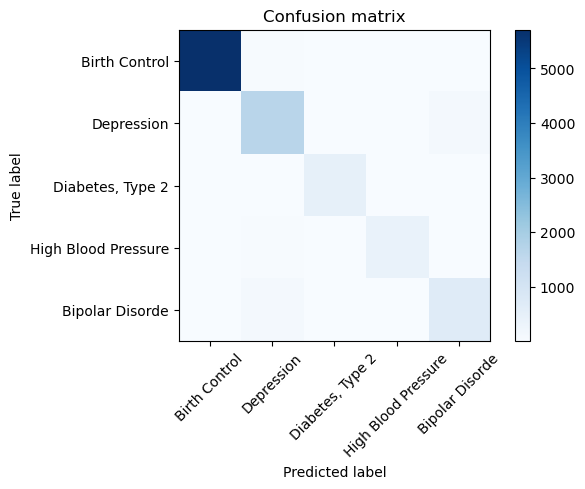

In [28]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Bipolar Disorde'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Bipolar Disorde'])


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)


accuracy:   0.868


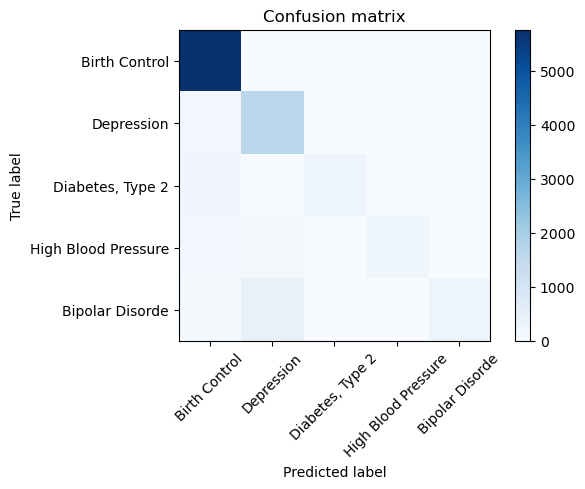

In [30]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Bipolar Disorde'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Bipolar Disorde'])


accuracy:   0.960


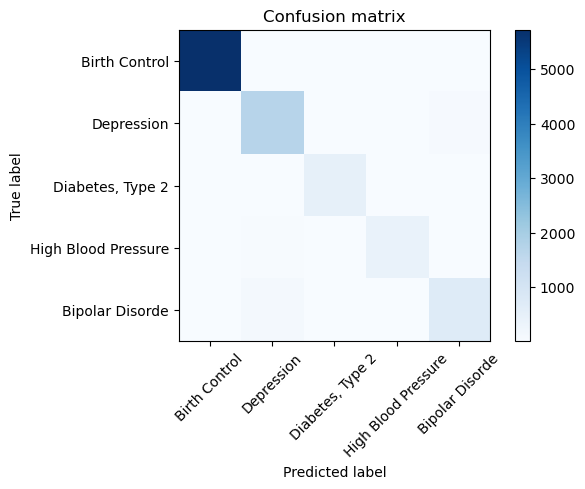

In [31]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Bipolar Disorde'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Bipolar Disorde'])


accuracy:   0.969


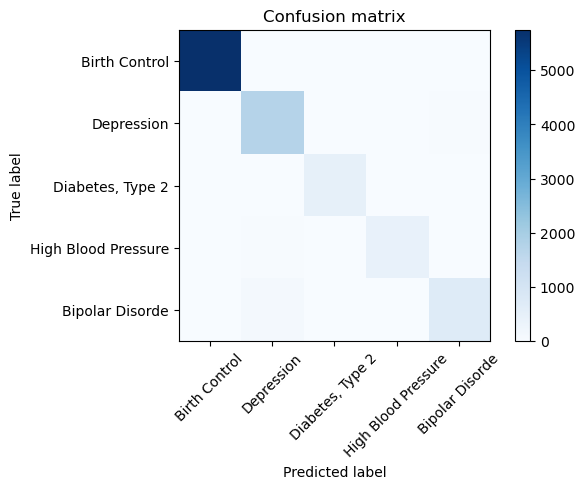

In [32]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Bipolar Disorde'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Bipolar Disorde'])


accuracy:   0.967


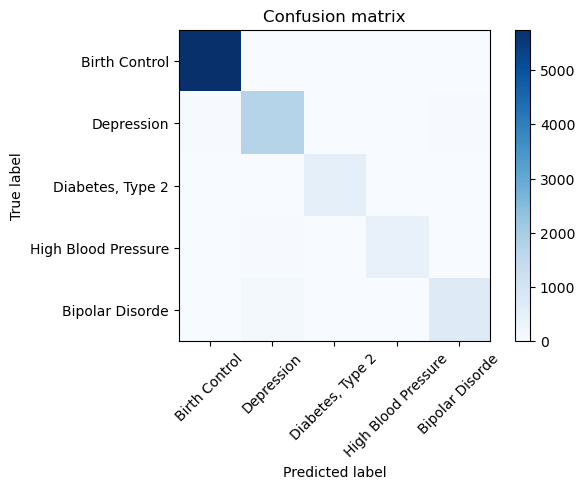

In [33]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Bipolar Disorde'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Bipolar Disorde'])


In [34]:
def top_drugs_extractor(condition):
    df_top = data[(data['rating']>=9)&(data['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test


In [35]:
statement = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
    
  ]

In [36]:
X.tail()

,condition,review,review_clean
161278,"Diabetes, Type 2",I just got diagnosed with type 2. My doctor pr...,got diagnosed type doctor prescribed invokana ...
161283,Bipolar Disorde,I was in a very bad place at the time I starte...,bad place time started taking doctor wanted we...
161286,Depression,This is the third med I&#039;ve tried for anxi...,third med tried anxiety mild depression week h...
161290,High Blood Pressure,I have only been on Tekturna for 9 days. The e...,tekturna day effect immediate also calcium cha...
161291,Birth Control,This would be my second month on Junel. I&#039...,would second month junel birth control year ch...


In [47]:
tfidf_trigram = tfidf_vectorizer3.transform(statement)


predictions = pass_tf.predict(tfidf_trigram)
label==["High Blood Pressure","Depression","Diabetes, Type 2","Birth Control",'Bipolar Disorde']
for text, label in zip(statement, predictions):
        
        target=label
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
#     elif label=="Depression":
#         target="Depression"
#         top_drugs = top_drugs_extractor(label)
#         print("text:", text, "\nCondition:", target)
#         print("Top 3 Suggested Drugs:")
#         print(top_drugs[0])
#         print(top_drugs[1])
#         print(top_drugs[2])
#         print()
#     elif label=="Diabetes, Type 2":
#         target="Diabetes, Type 2"
#         top_drugs = top_drugs_extractor(label)
#         print("text:", text, "\nCondition:", target)
#         print("Top 3 Suggested Drugs:")
#         print(top_drugs[0])
#         print(top_drugs[1])
#         print(top_drugs[2])
#         print()
#     else:
#         target="Birth Control"
#         print("text:", text, "\Condition:", target)
#         top_drugs = top_drugs_extractor(label)
#         print("text:", text, "\nCondition:", target)
#         print("Top 3 Suggested Drugs:")
#         print(top_drugs[0])
#         print(top_drugs[1])
#         print(top_drugs[2])
#         print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Losartan
Aldactone
Spironolactone

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap. 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Zoloft
Viibryd

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losi